In [171]:
import random
import numpy as np
import matplotlib.pyplot as plt
class ReinforcementAgent():
    
    def __init__(self,informed,payoffMatrixLeft, payOffMatrixRight,p, sda, propensityA, propensityB):
        self.informed = informed
        self.m = [0,0]
        self.p = p
        self.strategy = ['A','B']
        self.payoffMatrixLeft = payoffMatrixLeft
        self.payOffMatrixRight = payOffMatrixRight
        self.playerNo = 0 if informed == True else 1
        self.propensityA = propensityA
        self.propensityB = propensityB
        self.sda = sda
     
    def update_propensity(self,payoff, action_by_player):
        if( action_by_player == 'A'):
            self.propensityA = self.propensityA + payoff
            self.propensityB = self.propensityB
        else:
            self.propensityA = self.propensityA
            self.propensityB = self.propensityB + payoff
            
        
    
    def Action(self, stage , selected):
        m = [1-self.p, self.p]
        if(stage == 1 and self.informed == False):
            #player 2 plays random action:
            action =  random.choices(self.strategy, m)
        elif ( stage ==2 and self.informed == True):
            #player 1 takes best action possible
            if(selected == 'Left'):
                return self.sda[0]   #A
            else:
                return self.sda[1]   #B
        strength = self.propensityA + self.propensityB 
        self.m[0] = self.propensityA / strength
        self.m[1] = self.propensityB / strength
        action = random.choices(self.strategy, m)
        return action[0]

              

In [172]:
class Game():
    def __init__(self, payOffRight, payOffLeft, p, p1, p2):
        self.payOffRight = payOffRight
        self.payOffLeft = payOffLeft
        self.p = [p,1-p]
        self.p1 = p1
        self.p2 = p2
        self.actionDict = {"A":0, "B":1}
        self.matrix_choices = ['Left', 'Right']
        self.list1 = []
        self.list2 = []
       
    def play_round(self):
        selected = random.choices(self.matrix_choices, self.p)

        a11 = p1.Action(stage = 1, selected = selected)
        a12 = p2.Action(stage = 1, selected = None)

        a21 = p1.Action(stage = 2, selected = selected)
        a22 = p2.Action(stage = 2, selected = None)

        nparray = np.array([self.getReward(selected, a11, a12), self.getReward(selected, a21, a22)])

        rewards = np.sum(nparray, axis=0)

        s = 0 if selected == 'Left' else 1
        return rewards, a11, a22, s
        
        
    def getReward(self, selected , action1, action2):
        if(selected == 'Left'):
            matrix = payOffLeft
        else:
            matrix = payOffRight
        
        return matrix[self.actionDict[action1]][self.actionDict[action2]]
        

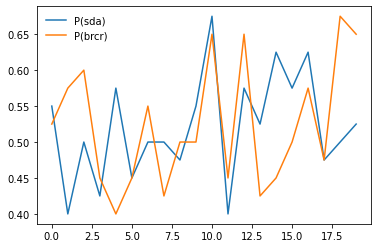

In [175]:
payOffLeft = [  [ [1,0], [0,1]] ,     
                [ [0,1], [0,1]] ]

payOffRight = [  [ [0,1], [0,1]] ,     
                [ [0,1], [1,0]] ]

sda = ['A', 'B']
brcr = ['B', 'A']

p = 0.5
list1 = []
list2 = []
p1 = ReinforcementAgent(informed = True, payoffMatrixLeft = payOffLeft, payOffMatrixRight = payOffRight,
                sda = sda, p = p,propensityA = 1,propensityB = 1)

p2 = ReinforcementAgent(informed = False, payoffMatrixLeft = payOffLeft, payOffMatrixRight = payOffRight,
                sda = sda, p = p, propensityA = 1,propensityB = 1)

game = Game(payOffRight = payOffRight, payOffLeft = payOffLeft, p = p, p1 = p1, p2 = p2)

rounds = 40
payoffs = []

episodes = 20
av_payOff = []
avpsda = []
avpbrcr = []
for ep in range(episodes):
    payoffs = []
    psda = 0
    pbrcr = 0
    for i in range(rounds):
        
        p, p1action, p2action, selected = game.play_round()
        p1.update_propensity(payoff = p, action_by_player = p1action)
        p2.update_propensity(payoff = p, action_by_player = p2action)

            
        payoffs.append(p)
        if(p1action == sda[selected]):
            psda+=1
        if(p2action == brcr[selected]):
            pbrcr+=1
    
    payoffs = np.array(payoffs)
    av_payOff.append(np.average(payoffs, axis = 0))
    avpsda.append(psda/rounds)
    avpbrcr.append(pbrcr/rounds)

#plt.plot(av_payOff)
plt.plot(avpsda, label = "P(sda)")
plt.plot(avpbrcr, label = "P(brcr)")
plt.legend(frameon=False)



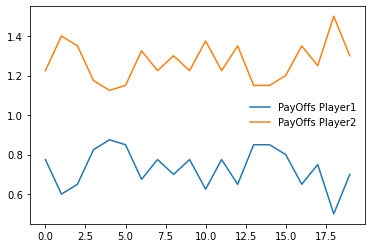

In [176]:
av_payOff = np.array(av_payOff)
plt.plot(av_payOff[:,0], label = "PayOffs Player1")
plt.plot(av_payOff[:,1], label = "PayOffs Player2")

plt.legend(frameon=False)

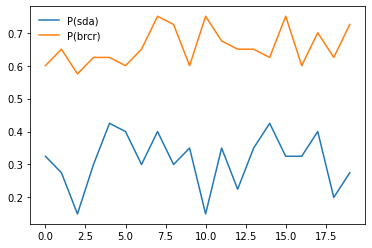

In [177]:
p = 0.34

p1 = ReinforcementAgent(informed = True, payoffMatrixLeft = payOffLeft, payOffMatrixRight = payOffRight,
                sda = sda, p = p,propensityA = 1,propensityB = 1)

p2 = ReinforcementAgent(informed = False, payoffMatrixLeft = payOffLeft, payOffMatrixRight = payOffRight,
                sda = sda, p = p, propensityA = 1,propensityB = 1)

game = Game(payOffRight = payOffRight, payOffLeft = payOffLeft, p = p, p1 = p1, p2 = p2)

rounds = 40
payoffs = []

episodes = 20
av_payOff = []
avpsda = []
avpbrcr = []
for ep in range(episodes):
    payoffs = []
    psda = 0
    pbrcr = 0
    for i in range(rounds):
    
        p, p1action, p2action, selected = game.play_round()
        p1.update_propensity(payoff = p, action_by_player = p1action)
        p2.update_propensity(payoff = p, action_by_player = p2action)
            
        payoffs.append(p)
        if(p1action == sda[selected]):
            psda+=1
        if(p2action == brcr[selected]):
            pbrcr+=1
    
    payoffs = np.array(payoffs)
    av_payOff.append(np.average(payoffs, axis = 0))
    avpsda.append(psda/rounds)
    avpbrcr.append(pbrcr/rounds)

#plt.plot(av_payOff)
plt.plot(avpsda, label = "P(sda)")
plt.plot(avpbrcr, label = "P(brcr)")
plt.legend(frameon=False)



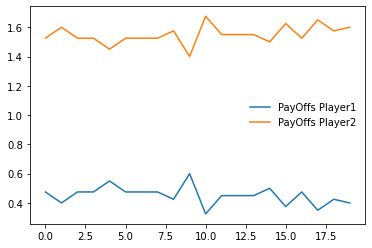

In [178]:
av_payOff = np.array(av_payOff)
plt.plot(av_payOff[:,0], label = "PayOffs Player1")
plt.plot(av_payOff[:,1], label = "PayOffs Player2")

plt.legend(frameon=False)